**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
TXT_FNAME_ANNOT = "region.annotation.encode_e2g_benchmark.tsv"

**View files**

In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_ANNOT
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.encode_e2g_benchmark.tsv 


## Import data

**Read region annotation**

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = TXT_FNAME_ANNOT
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = VEC_TXT_FOLDER

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 8770   11

$fcc_astarr_macs_input_union
[1] 9229   11



Chrom,ChromStart,ChromEnd,Region,Group,Label,Target,Score,NLog10P,Regulated,Source
chr1,3774056,3776283,chr1:3774056-3776283,E2G-Benchmark,Regulated:TRUE,CEP104,-0.2934319,2.395344,TRUE,Ulirsch2016
chr1,3774056,3776283,chr1:3774056-3776283,E2G-Benchmark,Regulated:TRUE,LRRC47,-0.3311781,2.109514,TRUE,Ulirsch2016
chr1,3774056,3776283,chr1:3774056-3776283,E2G-Benchmark,Regulated:TRUE,SMIM1,-0.4720192,3.192703,TRUE,Ulirsch2016


## Summarize

In [6]:
### helper function
fun_get_absmax = function(x){ x[which.max(abs(x))] }

### loop to summarize the scores
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    ### Score = absolute max of scores across all link
    dat = dat %>%
        dplyr::group_by(Chrom, ChromStart, ChromEnd, Region) %>%
        dplyr::summarize(
            Score = fun_get_absmax(Score),
            .groups = "drop"
        )
    return(dat)
})

### assign and show
lst_dat_region_annot_result = lst
cat("Region:", names(lst), "\n\n")
dat = lst[[1]]
fun_display_table(head(dat, 3))

Region: fcc_astarr_macs_input_overlap fcc_astarr_macs_input_union 



Chrom,ChromStart,ChromEnd,Region,Score
chr1,3774056,3776283,chr1:3774056-3776283,-0.4720192
chr1,3803955,3806146,chr1:3803955-3806146,0.0256769
chr1,4126841,4128109,chr1:4126841-4128109,0.0233838


**Explore: score**

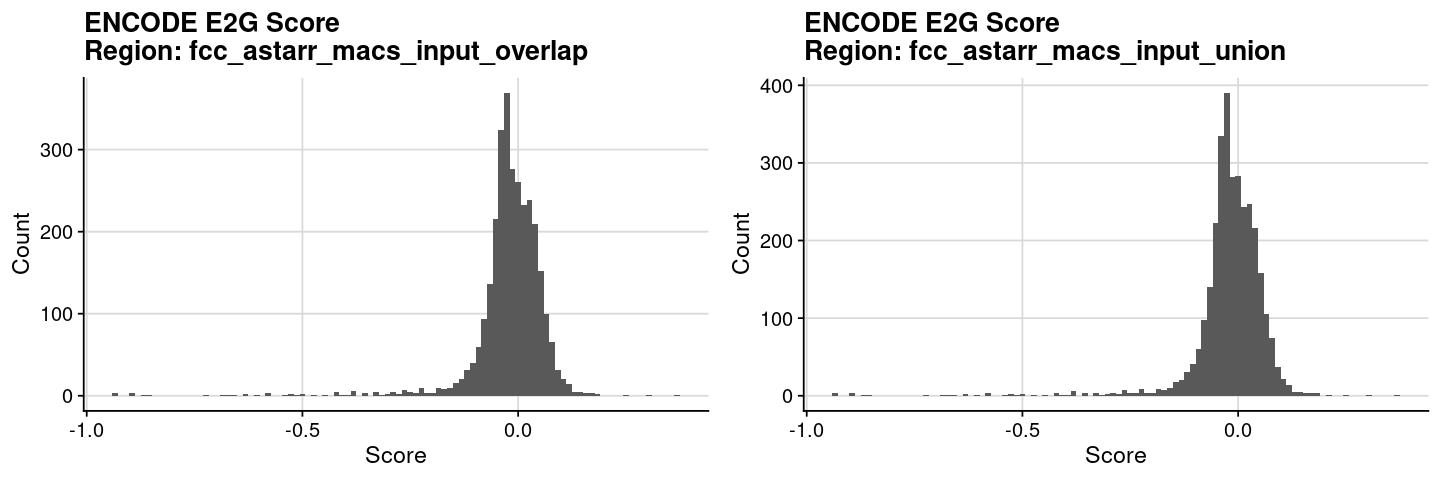

In [7]:
lst = lst_dat_region_annot_result
lst = lapply(names(lst), function(idx){
    txt = paste0("ENCODE E2G Score", "\n", "Region: ", idx)
    dat = lst[[idx]]
    gpt = ggplot(dat, aes(x=Score)) + 
        geom_histogram(bins = 100) + 
        theme_cowplot() +
        background_grid() +
        labs(x = "Score", y = "Count", title = txt)
    return(gpt)
})
options(repr.plot.height=4, repr.plot.width=12)
plot_grid(plotlist = lst, nrow=1)

## Export

In [8]:
for (txt_folder in VEC_TXT_FOLDER){

    ### get tables
    dat_region_annot_result = lst_dat_region_annot_result[[txt_folder]]
    
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    
    ### write table
    txt_fname = "region.annotation.encode_e2g_benchmark.score.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    dat = dat_region_annot_result
    dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd)
    write_tsv(dat, txt_fpath)
}